In [1]:
#titanic dataset

In [2]:
import numpy as np
import pandas as pd

#data analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#data visulation

In [4]:
train = pd.read_csv("titanic_train.csv") #click tab to autocomplete

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


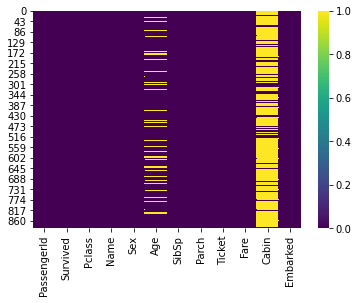

In [7]:
sns.heatmap(train.isnull(),cmap='viridis')  

#due to the cmap value every true value is yellow

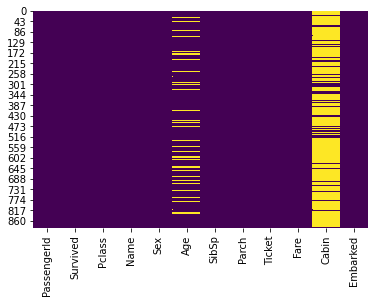

In [8]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False)

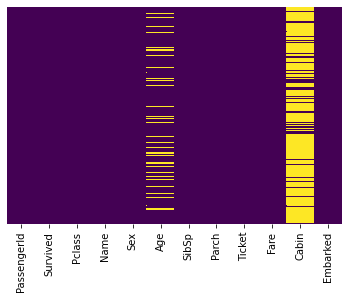

In [9]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [10]:
# we saw that we are missing some Age info. and a lot of Cabin Info
# from the heatmap

In [11]:
# roughly about 20% of that age data is missing
# proportion is less for missing values so i can use
# knowledge from other columns to fill in those values

In [12]:
# for cabin column we are missing a lot of it
# so we are going to drop it

In [13]:
sns.set_style('whitegrid')

In [14]:
train["Survived"]  # tell wheathe a person suvives or not

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

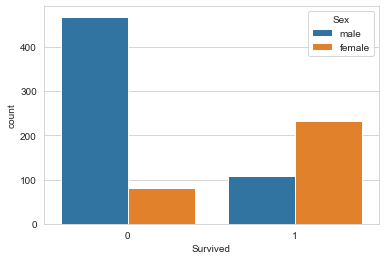

In [15]:
# see the count of survived vs non-survived
sns.countplot(x='Survived',data=train,hue='Sex')

# a count plot is essentially a histogram for categorical data(like here for 0 and 1)
# survived or not


In [16]:
# countplots tells people survived are mostly females
# and who didn't are more likely to be male
# we'll see what factors led to survival or not
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

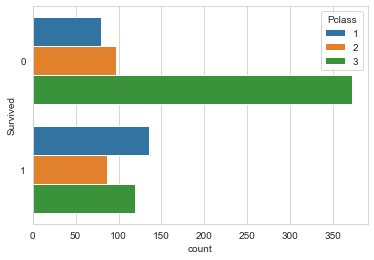

In [17]:
# lets see for pclass (passenger class)
sns.countplot(y='Survived',data=train,hue='Pclass')

In [18]:
# looks like mostly 3rd class people didn't survive

In [19]:
# sns.countplot(x='Survived',data=train,hue='Age') 
# lets see the age of people on the ships


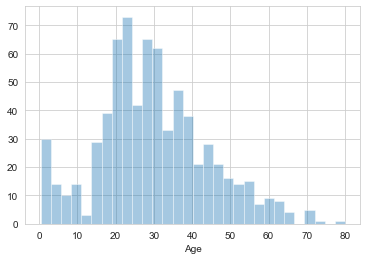

In [20]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
# looks like mostly people are of the age 20-35

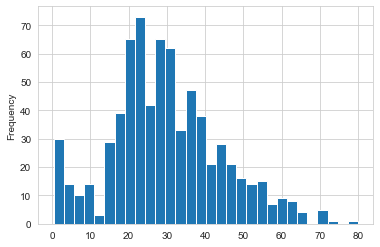

In [21]:
# or just use the pandas builtin vizz
train['Age'].plot.hist(bins=30)

In [22]:
# lets see what are left to explore
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


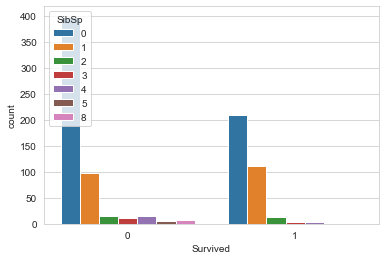

In [23]:
# SibSp (sibling and spouse) on the ship
sns.countplot(x='Survived',data=train,hue='SibSp')

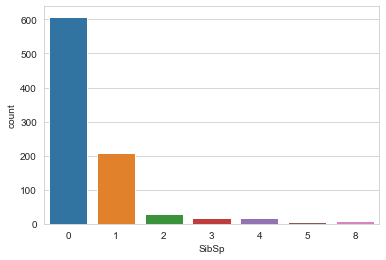

In [24]:
sns.countplot(x='SibSp',data=train)

In [25]:
# looking at the plot above tells that most of the people didn't have
# neither sibling nor spouse on the board

In [26]:
# lets explore the fare 
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

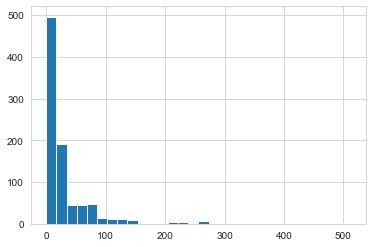

In [27]:
train['Fare'].hist(bins=30)

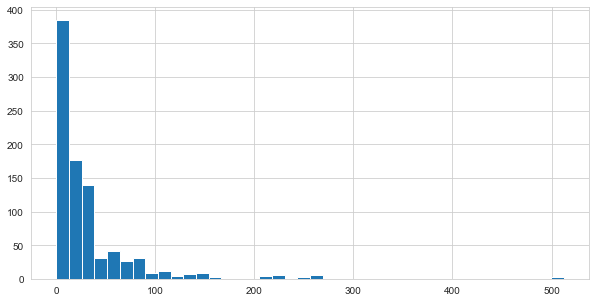

In [28]:
train['Fare'].hist(bins=40,figsize=(10,5))

In [29]:
# its obvious that most people are in third class and bcz of that 
# they are having smaller fare btwn 0-60

In [30]:
# lets do it using cufflinks
import cufflinks as cf

In [31]:
cf.go_offline()

In [32]:
train['Fare'].iplot(kind='hist',bins=30)

In [33]:
# we're done with analysis of data viz

### Part-2

#### Cleaning the data so as to make it acceptable to our ML algorithm 

In [34]:
# filling the missing value of age
# let's say with the avg age

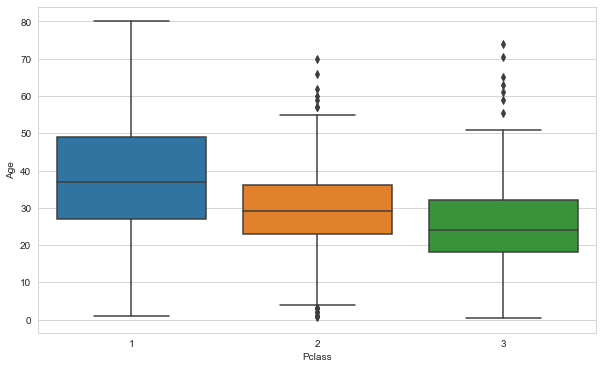

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [36]:
# we observe the age in 1st class if higher(older people mostly)
# cz they had more wealth or for security reasons etcetra

In [37]:
# if you want you could make a model to predict the age
# based off of the features

In [38]:
def imute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else :
        return Age

In [39]:
# apply
train['Age'] = train[['Age','Pclass']].apply(imute_age,axis=1)
# axis =1 cz across the columns we want to apply it

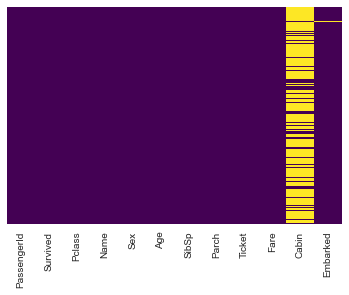

In [40]:
# sns.heatmap()
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [41]:
# we no-longer have null values for the age

In [42]:
# next problem here is cabin column
# too many missing values better to drop it

In [49]:
train.drop('Cabin',inplace=True,axis=1)

In [50]:
train.columns   # no cabin column

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

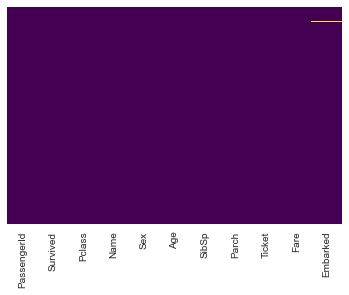

In [51]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [45]:
# see we dropped the Cabin column from it

In [46]:
# still one or two values are missing in some cols
# train.drop('Embarked',axis=1,inplace=True)

In [53]:
train.dropna(inplace=True)  #use dropna

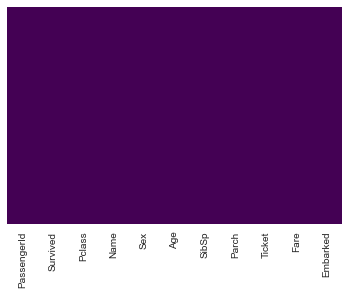

In [54]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [55]:
# Boom there is no missing value now

#### step2 of cleaning the data
* categorical data to numerical using pands

In [58]:
# use the get_dummies() method of pandas
# Convert categorical variable into dummy/indicator variables.

# pd.get_dummies(train)

In [60]:
# this leads to multicolum collinearity where one column is perfect predictor 
# of the other so that we don't want to feed to our ML algorithm
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [62]:
# so we drop first cols
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [63]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [66]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [68]:
embark.head()  #We see one column is not the perfect predictor of the other

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
# concatenate them
train = pd.concat([train,sex,embark],axis=1)

In [70]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [71]:
# we see we don't need Embarked and Sex cols anymore 
# bcz we have encoded them into Q,S and male cols respectively

In [72]:
# lets drop the unnecessary cols

In [73]:
train.drop(['Embarked','Sex','Name','Ticket'], axis=1, inplace=True)

In [74]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [76]:
# here PassengeId is simply the index it doesn't help
# to predict wheather a passenger will surive or not
# so lets drop it

In [77]:
train.drop('PassengerId',axis=1,inplace=True)

In [78]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [79]:
# now we have our cleaned data ready to fed into our ML algorithm

In [80]:
# but interesting thing here is Pclass is also a categorical cols
# we could run the pd.get_dummies() for this and then work further

### Part-3

#### Building the model

In [82]:
# here lets condsider train being only data with us
# otherwise need to do cleaning of test.csv also 
# to test it

In [83]:
# y is the cols that you want to predict
# everything being the features
x = train.drop('Survived',axis=1,)

y = train['Survived']

In [85]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [89]:
# create the model

In [90]:
from sklearn.linear_model import LogisticRegression 

In [98]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=300)

In [99]:
# next step is train the model

In [100]:
logmodel.fit(X_train,y_train,sample_weight=None)

LogisticRegression(max_iter=300)

#### classification

In [105]:
predictions = logmodel.predict(X_test)

In [106]:
# scikitlearn has nice classification that we can use

In [107]:
from sklearn.metrics import classification_report

In [108]:
# classification report will basically will tell 
# you f1-score, precision, etc easily

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [110]:
# if you want only pure confusion matrix

In [112]:
from sklearn.metrics  import confusion_matrix

In [113]:
confusion_matrix(y_test,predictions)

array([[156,  28],
       [ 26,  84]], dtype=int64)

In [114]:
# these results are not so bad since we are using smaller 
# data here

In [115]:
# in real time you may wanna use entire training dataset
# for training


In [116]:
# and comparing/testing it with test_csv
# after cleaning the test_csv 

In [117]:
# or can do some more feature engineering
# like grab the title of name and treat it as feature etc,